# Trader Behavior Insights from Market Sentiment (Fear vs Greed)

**Data Science Intern Assignment – Primetrade.ai**

Candidate: Mohamed Aslam

Objective:  
This project analyzes the relationship between Bitcoin market sentiment (Fear vs Greed) and trader behavior on the Hyperliquid platform. The goal is to identify patterns that may help inform better trading strategies.

In [1]:
import pandas as pd


<h1 align = "center">Dataset Overview and Data Quality Check</h1>

In [13]:
df_fear_greed = pd.read_csv("Dataset/fear_greed_index.csv")
df_historical = pd.read_csv("Dataset/historical_data.csv")

df_fear_greed.head()

,timestamp,value,classification,date
0,1517463000,30,Fear,2018-02-01
1,1517549400,15,Extreme Fear,2018-02-02
2,1517635800,40,Fear,2018-02-03
3,1517722200,24,Extreme Fear,2018-02-04
4,1517808600,11,Extreme Fear,2018-02-05


In [11]:
df_historical.head()

,Account,Coin,Execution Price,Size Tokens,Size USD,Side,Timestamp IST,Start Position,Direction,Closed PnL,Transaction Hash,Order ID,Crossed,Fee,Trade ID,Timestamp
0,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9769,986.87,7872.16,BUY,02-12-2024 22:50,0.000000,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.345404,8.950000e+14,1.730000e+12
1,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9800,16.00,127.68,BUY,02-12-2024 22:50,986.524596,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.005600,4.430000e+14,1.730000e+12
2,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9855,144.09,1150.63,BUY,02-12-2024 22:50,1002.518996,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050431,6.600000e+14,1.730000e+12
3,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9874,142.98,1142.04,BUY,02-12-2024 22:50,1146.558564,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050043,1.080000e+15,1.730000e+12
4,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9894,8.73,69.75,BUY,02-12-2024 22:50,1289.488521,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.003055,1.050000e+15,1.730000e+12


<h1 align = "center">Dataset Shape</h1>

In [19]:
print("Fear & Greed dataset shape:", df_fear_greed.shape)
print("Historical dataset shape:", df_historical.shape)

Fear & Greed dataset shape: (2644, 4)
Historical dataset shape: (211224, 16)


<h1 align = "center">Column Names</h1>

In [20]:
print(df_fear_greed.columns)
print(df_historical.columns)

Index(['timestamp', 'value', 'classification', 'date'], dtype='object')
Index(['Account', 'Coin', 'Execution Price', 'Size Tokens', 'Size USD', 'Side',
       'Timestamp IST', 'Start Position', 'Direction', 'Closed PnL',
       'Transaction Hash', 'Order ID', 'Crossed', 'Fee', 'Trade ID',
       'Timestamp'],
      dtype='object')


<h1 align = "center">Data Types</h1>

In [23]:
df_fear_greed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2644 entries, 0 to 2643
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   timestamp       2644 non-null   int64 
 1   value           2644 non-null   int64 
 2   classification  2644 non-null   object
 3   date            2644 non-null   object
dtypes: int64(2), object(2)
memory usage: 82.8+ KB


In [22]:
df_historical.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 211224 entries, 0 to 211223
Data columns (total 16 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Account           211224 non-null  object 
 1   Coin              211224 non-null  object 
 2   Execution Price   211224 non-null  float64
 3   Size Tokens       211224 non-null  float64
 4   Size USD          211224 non-null  float64
 5   Side              211224 non-null  object 
 6   Timestamp IST     211224 non-null  object 
 7   Start Position    211224 non-null  float64
 8   Direction         211224 non-null  object 
 9   Closed PnL        211224 non-null  float64
 10  Transaction Hash  211224 non-null  object 
 11  Order ID          211224 non-null  int64  
 12  Crossed           211224 non-null  bool   
 13  Fee               211224 non-null  float64
 14  Trade ID          211224 non-null  float64
 15  Timestamp         211224 non-null  float64
dtypes: bool(1), float64(

<h1 align = "center">Missing Values </h1>

In [25]:
print(df_fear_greed.isnull().sum())

timestamp         0
value             0
classification    0
date              0
dtype: int64


In [26]:
print(df_historical.isnull().sum())

Account             0
Coin                0
Execution Price     0
Size Tokens         0
Size USD            0
Side                0
Timestamp IST       0
Start Position      0
Direction           0
Closed PnL          0
Transaction Hash    0
Order ID            0
Crossed             0
Fee                 0
Trade ID            0
Timestamp           0
dtype: int64


<h1 align = "center">Duplicate Rows </h1>

In [28]:
print("Fear Greed duplicates:", df_fear_greed.duplicated().sum())


Fear Greed duplicates: 0


In [29]:
print("Historical duplicates:", df_historical.duplicated().sum())

Historical duplicates: 0


## Phase 1: Dataset Overview

In this phase, both datasets were loaded and inspected to understand their structure and quality.

**Fear & Greed Dataset**
- Rows: 2644
- Columns: 4
- Key columns: timestamp, value, classification, date
- This dataset shows the daily Bitcoin market sentiment such as Fear, Greed, or Neutral.

**Historical Trading Dataset**
- Rows: 211,224
- Columns: 16
- Key columns: Account, Coin, Execution Price, Size USD, Side, Closed PnL, Timestamp IST
- This dataset contains detailed trader activity including trade size, price, direction, and profit/loss.

**Data Quality Check**
- No missing values were found.
- No duplicate rows were found.

These checks confirm that the datasets are clean and ready for further preprocessing and analysis.

<h1 align = "center">Phase 2 Convert Fear & Greed Date </h1>

In [31]:
#Convert sentiment dataset date column to datetime
df_fear_greed["date"] = pd.to_datetime(df_fear_greed["date"])


df_fear_greed.head()

,timestamp,value,classification,date
0,1517463000,30,Fear,2018-02-01
1,1517549400,15,Extreme Fear,2018-02-02
2,1517635800,40,Fear,2018-02-03
3,1517722200,24,Extreme Fear,2018-02-04
4,1517808600,11,Extreme Fear,2018-02-05


<h1 align = "center">Convert Trader Timestamp </h1>

In [35]:
# Convert trader timestamp to datetime (day comes first)
df_historical["Timestamp IST"] = pd.to_datetime(
    df_historical["Timestamp IST"],
    dayfirst=True
)

# check result
df_historical.head()

,Account,Coin,Execution Price,Size Tokens,Size USD,Side,Timestamp IST,Start Position,Direction,Closed PnL,Transaction Hash,Order ID,Crossed,Fee,Trade ID,Timestamp
0,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9769,986.87,7872.16,BUY,2024-12-02 22:50:00,0.000000,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.345404,8.950000e+14,1.730000e+12
1,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9800,16.00,127.68,BUY,2024-12-02 22:50:00,986.524596,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.005600,4.430000e+14,1.730000e+12
2,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9855,144.09,1150.63,BUY,2024-12-02 22:50:00,1002.518996,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050431,6.600000e+14,1.730000e+12
3,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9874,142.98,1142.04,BUY,2024-12-02 22:50:00,1146.558564,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050043,1.080000e+15,1.730000e+12
4,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9894,8.73,69.75,BUY,2024-12-02 22:50:00,1289.488521,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.003055,1.050000e+15,1.730000e+12


<h1 align = "center">Extract Date from Trader Timestamp</h1>

In [36]:
# Extract only the date from timestamp
df_historical["date"] = df_historical["Timestamp IST"].dt.date

# Convert to datetime
df_historical["date"] = pd.to_datetime(df_historical["date"])

df_historical.head()

,Account,Coin,Execution Price,Size Tokens,Size USD,Side,Timestamp IST,Start Position,Direction,Closed PnL,Transaction Hash,Order ID,Crossed,Fee,Trade ID,Timestamp,date
0,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9769,986.87,7872.16,BUY,2024-12-02 22:50:00,0.000000,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.345404,8.950000e+14,1.730000e+12,2024-12-02
1,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9800,16.00,127.68,BUY,2024-12-02 22:50:00,986.524596,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.005600,4.430000e+14,1.730000e+12,2024-12-02
2,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9855,144.09,1150.63,BUY,2024-12-02 22:50:00,1002.518996,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050431,6.600000e+14,1.730000e+12,2024-12-02
3,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9874,142.98,1142.04,BUY,2024-12-02 22:50:00,1146.558564,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050043,1.080000e+15,1.730000e+12,2024-12-02
4,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9894,8.73,69.75,BUY,2024-12-02 22:50:00,1289.488521,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.003055,1.050000e+15,1.730000e+12,2024-12-02


<h1 align = "center">Merge Both Datasets</h1>

In [37]:
df_merged = pd.merge(
    df_historical,
    df_fear_greed[["date", "classification", "value"]],
    on="date",
    how="left"
)

df_merged.head()

,Account,Coin,Execution Price,Size Tokens,Size USD,Side,Timestamp IST,Start Position,Direction,Closed PnL,Transaction Hash,Order ID,Crossed,Fee,Trade ID,Timestamp,date,classification,value
0,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9769,986.87,7872.16,BUY,2024-12-02 22:50:00,0.000000,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.345404,8.950000e+14,1.730000e+12,2024-12-02,Extreme Greed,80.0
1,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9800,16.00,127.68,BUY,2024-12-02 22:50:00,986.524596,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.005600,4.430000e+14,1.730000e+12,2024-12-02,Extreme Greed,80.0
2,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9855,144.09,1150.63,BUY,2024-12-02 22:50:00,1002.518996,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050431,6.600000e+14,1.730000e+12,2024-12-02,Extreme Greed,80.0
3,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9874,142.98,1142.04,BUY,2024-12-02 22:50:00,1146.558564,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050043,1.080000e+15,1.730000e+12,2024-12-02,Extreme Greed,80.0
4,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9894,8.73,69.75,BUY,2024-12-02 22:50:00,1289.488521,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.003055,1.050000e+15,1.730000e+12,2024-12-02,Extreme Greed,80.0


<h1 align = "center">Check Sentiment Distribution</h1>

In [38]:
df_merged["classification"].value_counts()

classification
Fear             61837
Greed            50303
Extreme Greed    39992
Neutral          37686
Extreme Fear     21400
Name: count, dtype: int64

<h1 align = "center">Phase 3: Feature Engineering and Trading Metrics</h1>

In this phase, key trading metrics are created to analyze trader behavior and performance.

The metrics include:

- Daily profit and loss (PnL)
- Win rate of trades
- Average trade size
- Number of trades per day
- Long vs Short trading ratio

These metrics help understand how traders behave under different market sentiment conditions.

<h1 align = "center">Daily PnL</h1>

In [40]:
daily_pnl = df_merged.groupby("date")["Closed PnL"].sum().reset_index()

daily_pnl.head()

,date,Closed PnL
0,2023-05-01,0.000000
1,2023-12-05,0.000000
2,2023-12-14,-205.434737
3,2023-12-15,-24.632034
4,2023-12-16,0.000000


<h1 align = "center">Number of Trades Per Day</h1>

In [41]:
trades_per_day = df_merged.groupby("date").size().reset_index(name="num_trades")

trades_per_day.head()

,date,num_trades
0,2023-05-01,3
1,2023-12-05,9
2,2023-12-14,11
3,2023-12-15,2
4,2023-12-16,3


<h1 align = "center">Average Trade Size</h1>

In [43]:
avg_trade_size = df_merged.groupby("date")["Size USD"].mean().reset_index()

avg_trade_size.head()

,date,Size USD
0,2023-05-01,159.000000
1,2023-12-05,5556.203333
2,2023-12-14,10291.213636
3,2023-12-15,5304.975000
4,2023-12-16,5116.256667


<h1 align = "center">Win Rate</h1>

In [45]:
df_merged["win"] = df_merged["Closed PnL"] > 0

In [46]:
win_rate = df_merged["win"].mean()

print("Overall Win Rate:", win_rate)

Overall Win Rate: 0.4112648183918494


<h1 align = "center"> Long vs Short Ratio</h1>

In [47]:
long_short_ratio = df_merged["Side"].value_counts()

long_short_ratio

Side
SELL    108528
BUY     102696
Name: count, dtype: int64

<h1 align = "center"> Phase 3: Trading Metrics</h1>

In this phase, key metrics were created to analyze trader performance and behavior.

Metrics created:

- **Daily PnL:** Total profit or loss per day.
- **Trades per day:** Number of trades executed each day.
- **Average trade size:** Average trade value in USD.
- **Win rate:** Percentage of profitable trades.
- **Long vs Short ratio:** Distribution of BUY vs SELL trades.

Key observations from the dataset:

- Overall win rate is approximately **41%**.
- The number of SELL trades is slightly higher than BUY trades.
- Trading activity and trade sizes vary significantly across days.

These metrics will be used to analyze how trader performance and behavior change under different market sentiment conditions.

<h1 align = "center">Phase 4</h1>

<h1 align = "center">Compare PnL by Market Sentiment</h1>

In [48]:
sentiment_pnl = df_merged.groupby("classification")["Closed PnL"].mean().reset_index()

sentiment_pnl

,classification,Closed PnL
0,Extreme Fear,34.537862
1,Extreme Greed,67.892861
2,Fear,54.290400
3,Greed,42.743559
4,Neutral,34.307718


<h1 align = "center">Visualization</h1>

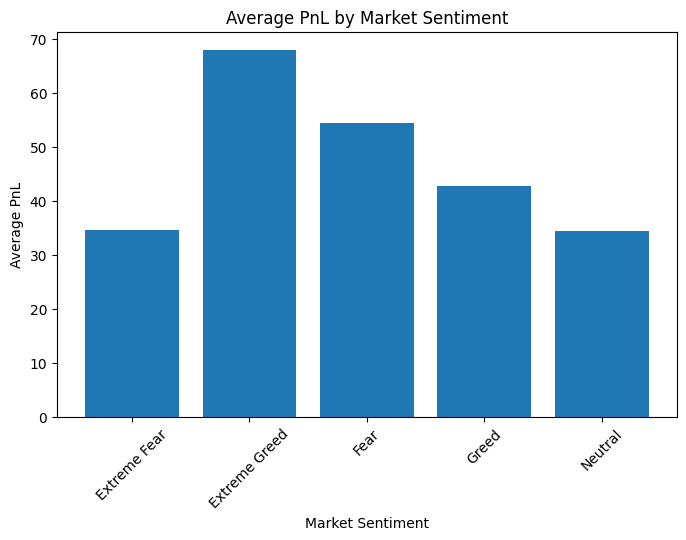

In [49]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
plt.bar(sentiment_pnl["classification"], sentiment_pnl["Closed PnL"])
plt.title("Average PnL by Market Sentiment")
plt.xlabel("Market Sentiment")
plt.ylabel("Average PnL")
plt.xticks(rotation=45)

plt.show()

<h1 align = "center">Insight 1: Trader Profitability vs Market Sentiment</h1>

The analysis shows that trader profitability varies across market sentiment conditions.

Average PnL results:

- Extreme Greed → ~67.9
- Fear → ~54.3
- Greed → ~42.7
- Extreme Fear → ~34.5
- Neutral → ~34.3

Traders appear to generate the highest average profits during **Extreme Greed** periods. This may indicate strong upward momentum in the market where traders benefit from bullish trends.

Lower profitability during **Extreme Fear and Neutral periods** suggests that uncertain or negative market conditions make trading more difficult.

This suggests that **market sentiment has a noticeable impact on trader performance**.

<h1 align = "center">Trades by Sentiment</h1>

In [50]:
trades_by_sentiment = df_merged.groupby("classification").size().reset_index(name="num_trades")

trades_by_sentiment

,classification,num_trades
0,Extreme Fear,21400
1,Extreme Greed,39992
2,Fear,61837
3,Greed,50303
4,Neutral,37686


<h1 align = "center">Visualization</h1>

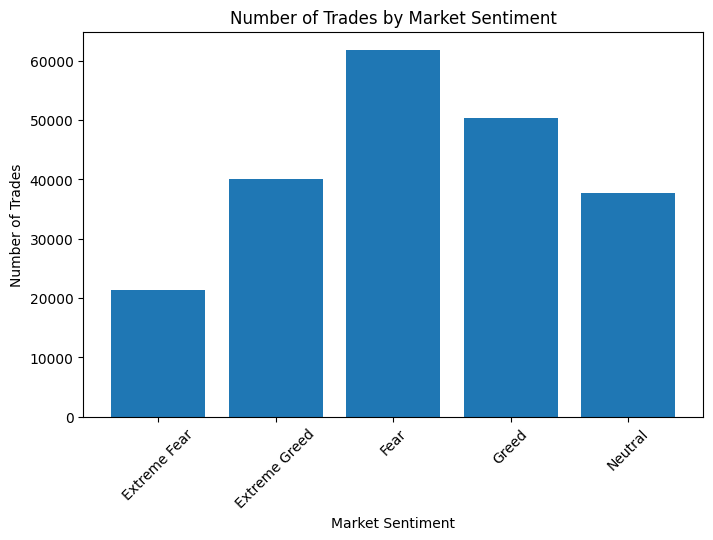

In [51]:
plt.figure(figsize=(8,5))

plt.bar(trades_by_sentiment["classification"], trades_by_sentiment["num_trades"])

plt.title("Number of Trades by Market Sentiment")
plt.xlabel("Market Sentiment")
plt.ylabel("Number of Trades")

plt.xticks(rotation=45)

plt.show()

<h1 align = "center">Insight 2:Trader Activity vs Market Sentiment</h1>

The number of trades varies across different market sentiment conditions.

Number of trades observed:

- Fear → 61,837 trades
- Greed → 50,303 trades
- Extreme Greed → 39,992 trades
- Neutral → 37,686 trades
- Extreme Fear → 21,400 trades

Trading activity is highest during **Fear periods**, suggesting that traders may react more actively when markets are uncertain or volatile.

Lower trading activity during **Extreme Fear** may indicate that some traders avoid trading when market conditions appear highly risky.

This indicates that **market sentiment influences trader participation and activity levels**.

<h1 align = "center">Average Trade Size by Sentiment</h1>

In [52]:
trade_size_sentiment = df_merged.groupby("classification")["Size USD"].mean().reset_index()

trade_size_sentiment

,classification,Size USD
0,Extreme Fear,5349.731843
1,Extreme Greed,3112.251565
2,Fear,7816.109931
3,Greed,5736.884375
4,Neutral,4782.732661


<h1 align = "center">Visualization</h1>

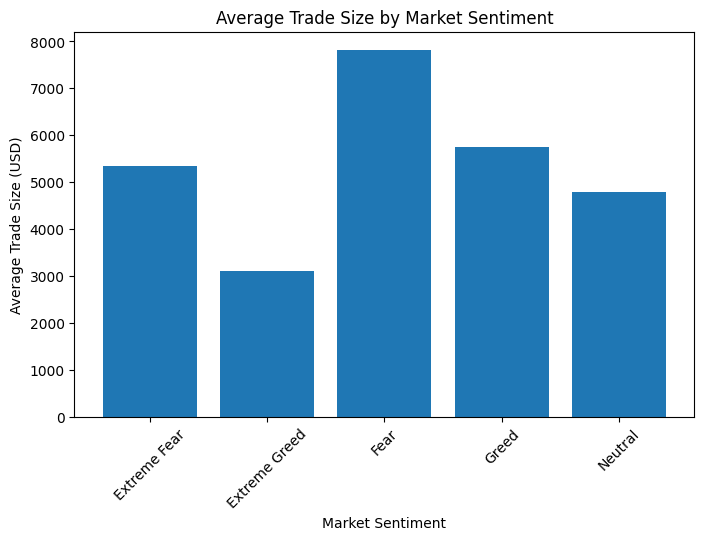

In [53]:
plt.figure(figsize=(8,5))

plt.bar(trade_size_sentiment["classification"], trade_size_sentiment["Size USD"])

plt.title("Average Trade Size by Market Sentiment")
plt.xlabel("Market Sentiment")
plt.ylabel("Average Trade Size (USD)")

plt.xticks(rotation=45)

plt.show()

<h1 align = "center">Insight 3: Trade Size vs Market Sentiment</h1>

The average trade size also varies across different sentiment conditions.

Average trade size results:

- Fear → ~7,816 USD
- Greed → ~5,736 USD
- Extreme Fear → ~5,349 USD
- Neutral → ~4,782 USD
- Extreme Greed → ~3,112 USD

The largest trade sizes occur during **Fear periods**, suggesting that traders may take larger positions when markets are uncertain or volatile.

Interestingly, **Extreme Greed periods show the smallest average trade size**, which may indicate that traders prefer making smaller trades during strong bullish conditions.

This suggests that **market sentiment influences trader risk-taking behavior and position sizing**.

<h1 align = "center">Strategy Recommendations</h1>

## Strategy Recommendations

Based on the analysis of trader performance and behavior across market sentiment conditions, the following strategy ideas are proposed:

### Strategy 1: Momentum-Based Trading During Extreme Greed

The analysis shows that trader profitability is highest during **Extreme Greed** periods.

Rule of thumb:
- Traders may benefit from following market momentum during strong bullish sentiment.
- Increasing participation during Extreme Greed periods could potentially improve profitability.

### Strategy 2: Risk Management During Fear Markets

Trading activity and trade sizes are highest during **Fear periods**, indicating that traders take larger positions during volatile markets.

Rule of thumb:
- Traders should apply stricter risk management during Fear markets.
- Reducing position size or leverage during high uncertainty may help limit potential losses.

## Summary

This analysis explored the relationship between Bitcoin market sentiment and trader behavior on Hyperliquid.

Key findings:

1. Trader profitability is highest during Extreme Greed periods.
2. Trading activity increases during Fear markets.
3. Traders tend to take larger positions during Fear conditions.

These results indicate that market sentiment plays an important role in shaping trading behavior and performance.